In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

from build.autodiff import (
    Var,
    Matrix,
    NeuralNetwork,
    GradientDescentOptimizer,
    MSELoss,
)

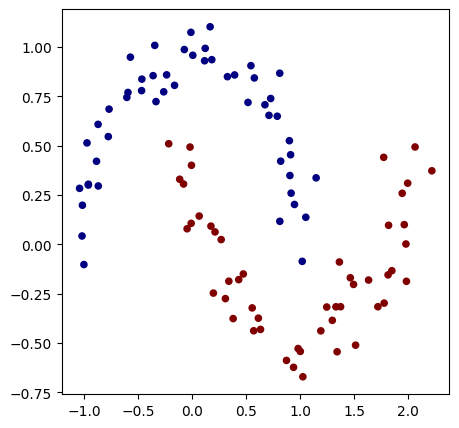

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [3]:
# Linear Regression
n_samples = 10

X = Matrix(n_samples, 1)  # shape: (n_samples, 1)
y = Matrix(n_samples, 1)  # shape: (n_samples, 1)

for i in range(n_samples):
    X[i, 0] = Var(i)
    y[i, 0] = 5.0 * i + 3.0

In [4]:
lr = 1e-2
epochs = 1000

model = NeuralNetwork([(1, 1)])
optimizer = GradientDescentOptimizer(learning_rate=lr, model=model)

model

NeuralNetwork =
[1 -> 1]

In [ ]:
# Training loop

for epoch in range(epochs):
    optimizer.resetGrad()

    # Forward pass
    Y_pred = model.forward(X)

    # Calculate the loss
    loss = MSELoss(y, Y_pred)
    loss_val = loss.getVal()

    # Backpropagation (Reverse-Mode Automatic Differentiation)
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimizeModelWeights()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Epoch: 1 | Train Loss: 854.7222813725882
Epoch: 101 | Train Loss: 0.4307603731945685
Epoch: 201 | Train Loss: 0.1387808282406251
Epoch: 301 | Train Loss: 0.04471190825729561
Epoch: 401 | Train Loss: 0.014405121841055305
Epoch: 501 | Train Loss: 0.004640990361260146
Epoch: 601 | Train Loss: 0.0014952175879500377
Epoch: 701 | Train Loss: 0.0004817238264437876
Epoch: 801 | Train Loss: 0.00015520005036981696
Epoch: 901 | Train Loss: 5.000179420770332e-05


In [6]:
# Make Predictions
y_pred = model.forward(X)

print(f"Ground Truth Labels:\n{y}\n")
print(f"Final Model Predictions:\n{y_pred}")

first_layer = model.layers[0]
W_learned, b_learned = first_layer

print(f"Learned W(0, 0) = {W_learned[0, 0]}")
print(f"Learned b(0, 0) = {b_learned[0, 0]}")

Ground Truth Labels:
Matrix(10 x 1) = 
3.000000 
8.000000 
13.000000 
18.000000 
23.000000 
28.000000 
33.000000 
38.000000 
43.000000 
48.000000 


Final Model Predictions:
Matrix(10 x 1) = 
2.992541 
7.993731 
12.994920 
17.996110 
22.997299 
27.998489 
32.999678 
38.000868 
43.002057 
48.003247 

Learned W(0, 0) = Var(val=5.001190, grad=0.000676)
Learned b(0, 0) = Var(val=2.992541, grad=-0.004236)


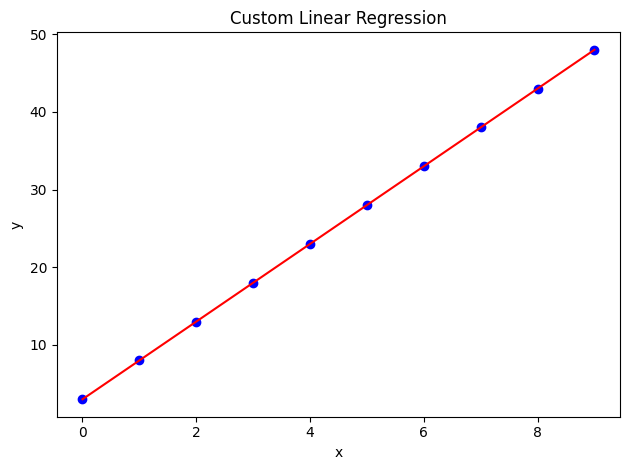

In [18]:
x_np = np.array([X[i, 0].getVal() for i in range(X.rows)])
y_np = np.array([y[i, 0].getVal() for i in range(y.rows)])
y_pred_np = np.array([y_pred[i, 0].getVal() for i in range(y_pred.rows)])

plt.scatter(x_np, y_np, color="blue")
plt.plot(x_np, y_pred_np, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Custom Linear Regression")

plt.tight_layout()
plt.show()